<a href="https://colab.research.google.com/github/Annettteee/annette-colab-projects/blob/main/Space_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Space Hackathon

##Predicting success of missions

####In this hackathon, we would load the data, clean it, perform analysis and create a machine learning model to predict the success of a space mission with factors like the location, the company, as well as other dependent variables.

##Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

##Load Data

In [ ]:
data = pd.read_csv('/content/space_missions_dataset.csv')
data.head()

,Mission ID,Mission Name,Launch Date,Target Type,Target Name,Mission Type,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Launch Vehicle
0,MSN-0001,Mission-1,2025-01-01,Star,Titan,Colonization,7.05,5.2,526.68,64.3,21,100.0,731.88,99.78,SLS
1,MSN-0002,Mission-2,2025-01-08,Exoplanet,Betelgeuse,Colonization,41.76,23.0,234.08,84.4,72,89.6,4197.41,45.72,Starship
2,MSN-0003,Mission-3,2025-01-15,Asteroid,Mars,Exploration,49.22,28.8,218.68,98.6,16,98.6,4908.00,36.12,Starship
3,MSN-0004,Mission-4,2025-01-22,Exoplanet,Titan,Colonization,26.33,17.8,232.89,36.0,59,90.0,2569.05,40.67,Starship
4,MSN-0005,Mission-5,2025-01-29,Exoplanet,Proxima b,Mining,8.67,9.2,72.14,96.5,31,73.2,892.76,12.40,Starship


##Remove duplicate rows

In [ ]:
data.drop_duplicates(inplace=True)

##Remove null or empty rows

In [ ]:
data.dropna(inplace= True)
data

,Mission ID,Mission Name,Launch Date,Target Type,Target Name,Mission Type,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Launch Vehicle
0,MSN-0001,Mission-1,2025-01-01,Star,Titan,Colonization,7.05,5.2,526.68,64.3,21,100.0,731.88,99.78,SLS
1,MSN-0002,Mission-2,2025-01-08,Exoplanet,Betelgeuse,Colonization,41.76,23.0,234.08,84.4,72,89.6,4197.41,45.72,Starship
2,MSN-0003,Mission-3,2025-01-15,Asteroid,Mars,Exploration,49.22,28.8,218.68,98.6,16,98.6,4908.00,36.12,Starship
3,MSN-0004,Mission-4,2025-01-22,Exoplanet,Titan,Colonization,26.33,17.8,232.89,36.0,59,90.0,2569.05,40.67,Starship
4,MSN-0005,Mission-5,2025-01-29,Exoplanet,Proxima b,Mining,8.67,9.2,72.14,96.5,31,73.2,892.76,12.40,Starship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,MSN-0496,Mission-496,2034-06-28,Planet,Betelgeuse,Colonization,48.26,25.3,274.82,91.2,64,96.2,4837.16,44.97,Ariane 6
496,MSN-0497,Mission-497,2034-07-05,Asteroid,Betelgeuse,Exploration,0.35,4.1,379.71,82.6,61,100.0,62.59,67.88,SLS
497,MSN-0498,Mission-498,2034-07-12,Planet,Ceres,Exploration,47.60,26.6,296.45,98.6,29,100.0,4794.01,51.38,Falcon Heavy
498,MSN-0499,Mission-499,2034-07-19,Planet,Betelgeuse,Research,31.99,18.0,457.38,77.9,39,100.0,3102.16,86.28,SLS


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Mission ID                         500 non-null    object 
 1   Mission Name                       500 non-null    object 
 2   Launch Date                        500 non-null    object 
 3   Target Type                        500 non-null    object 
 4   Target Name                        500 non-null    object 
 5   Mission Type                       500 non-null    object 
 6   Distance from Earth (light-years)  500 non-null    float64
 7   Mission Duration (years)           500 non-null    float64
 8   Mission Cost (billion USD)         500 non-null    float64
 9   Scientific Yield (points)          500 non-null    float64
 10  Crew Size                          500 non-null    int64  
 11  Mission Success (%)                500 non-null    float64

##Look for missing values

In [ ]:
missing_values = data.isnull().sum()
missing_values

,0
Mission ID,0
Mission Name,0
Launch Date,0
Target Type,0
Target Name,0
Mission Type,0
Distance from Earth (light-years),0
Mission Duration (years),0
Mission Cost (billion USD),0
Scientific Yield (points),0


##Checking for outliers

In [ ]:
data.describe()

,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,25.483060,15.736800,277.300280,55.223400,50.118000,92.616600,2543.522140,50.355620
std,14.942128,7.578316,141.137422,26.446232,27.660989,9.391094,1492.964489,28.227546
min,0.350000,1.400000,13.320000,10.000000,1.000000,66.000000,18.060000,1.020000
25%,11.750000,8.900000,149.960000,33.775000,27.000000,85.500000,1177.315000,25.567500
50%,26.185000,16.400000,282.170000,54.400000,50.000000,98.600000,2597.985000,50.995000
75%,38.570000,22.200000,399.995000,79.025000,74.000000,100.000000,3859.355000,74.482500
max,49.900000,29.500000,538.320000,99.800000,99.000000,100.000000,5018.600000,99.780000


##Standardizing the data formats

In [ ]:
data_column = 'Launch Date'
data[data_column] = pd.to_datetime(data[data_column])

##What do space missions look like each year?

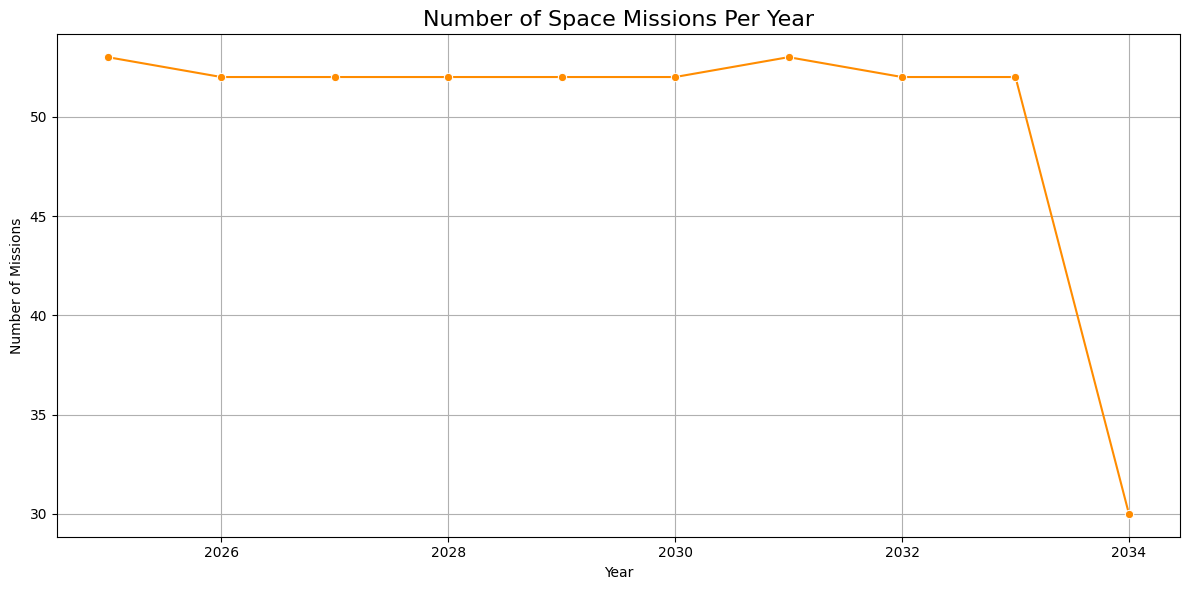

In [ ]:
# First, make sure the 'Launch Date' column is in datetime format
data['Launch Date'] = pd.to_datetime(data['Launch Date'])

# Extract the year from the Launch Date
data['Launch Year'] = data['Launch Date'].dt.year

# Group by year and count number of missions
missions_per_year = data['Launch Year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12,6))
sns.lineplot(x=missions_per_year.index, y=missions_per_year.values, marker='o', color='darkorange')
plt.title('Number of Space Missions Per Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.grid(True)
plt.tight_layout()
plt.show()


##Creating a categorical variable for success

In [ ]:
def categorize_success(row):
    if row >= 80:
        return 'Success'
    elif row >= 50:
        return 'Partial'
    else:
        return 'Failure'

data['Success Category'] = data['Mission Success (%)'].apply(categorize_success)
data


,Mission ID,Mission Name,Launch Date,Target Type,Target Name,Mission Type,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Launch Vehicle,Launch Year,Success Category
0,MSN-0001,Mission-1,2025-01-01,Star,Titan,Colonization,7.05,5.2,526.68,64.3,21,100.0,731.88,99.78,SLS,2025,Success
1,MSN-0002,Mission-2,2025-01-08,Exoplanet,Betelgeuse,Colonization,41.76,23.0,234.08,84.4,72,89.6,4197.41,45.72,Starship,2025,Success
2,MSN-0003,Mission-3,2025-01-15,Asteroid,Mars,Exploration,49.22,28.8,218.68,98.6,16,98.6,4908.00,36.12,Starship,2025,Success
3,MSN-0004,Mission-4,2025-01-22,Exoplanet,Titan,Colonization,26.33,17.8,232.89,36.0,59,90.0,2569.05,40.67,Starship,2025,Success
4,MSN-0005,Mission-5,2025-01-29,Exoplanet,Proxima b,Mining,8.67,9.2,72.14,96.5,31,73.2,892.76,12.40,Starship,2025,Partial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,MSN-0496,Mission-496,2034-06-28,Planet,Betelgeuse,Colonization,48.26,25.3,274.82,91.2,64,96.2,4837.16,44.97,Ariane 6,2034,Success
496,MSN-0497,Mission-497,2034-07-05,Asteroid,Betelgeuse,Exploration,0.35,4.1,379.71,82.6,61,100.0,62.59,67.88,SLS,2034,Success
497,MSN-0498,Mission-498,2034-07-12,Planet,Ceres,Exploration,47.60,26.6,296.45,98.6,29,100.0,4794.01,51.38,Falcon Heavy,2034,Success
498,MSN-0499,Mission-499,2034-07-19,Planet,Betelgeuse,Research,31.99,18.0,457.38,77.9,39,100.0,3102.16,86.28,SLS,2034,Success


##Visualizing Mission outcomes

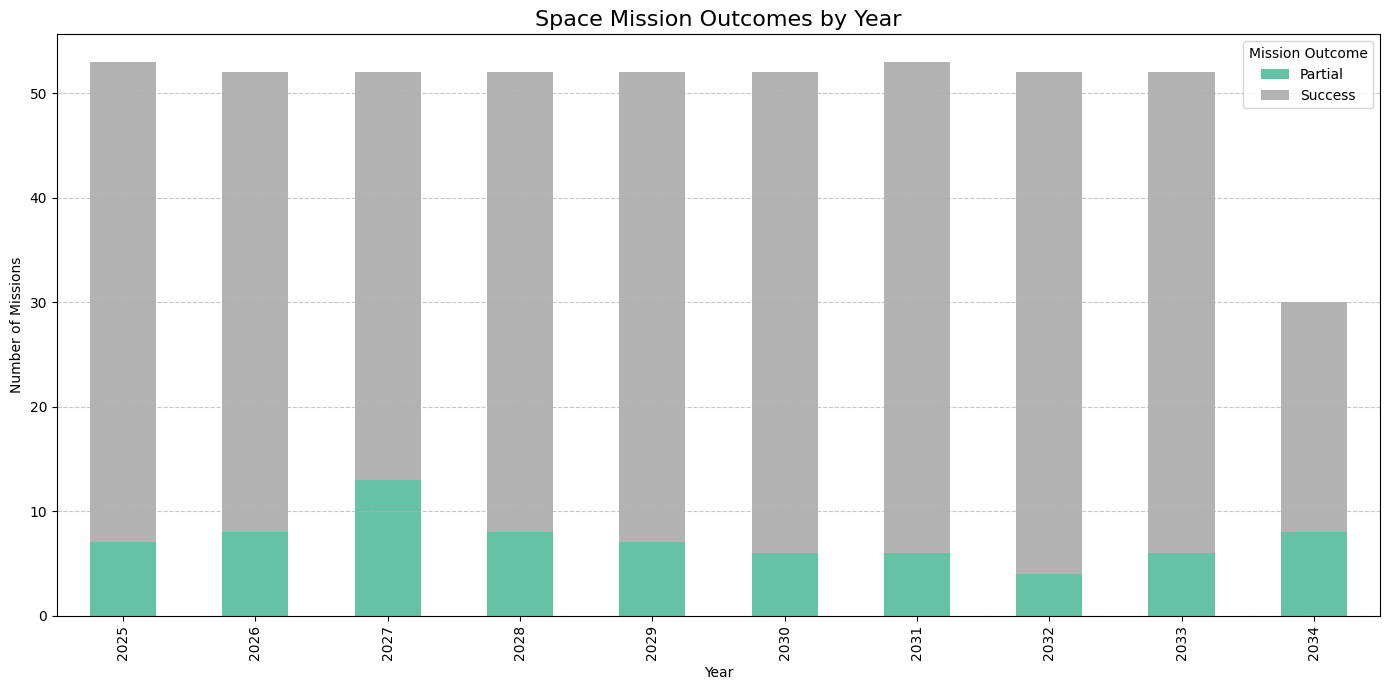

In [ ]:
data['Launch Year'] = data['Launch Date'].dt.year

success_by_year = data.groupby(['Launch Year', 'Success Category']).size().unstack(fill_value=0)


success_by_year.plot(kind='bar', stacked=True, figsize=(14,7), colormap='Set2')
plt.title('Space Mission Outcomes by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.legend(title='Mission Outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##Creating a new dataset and adding failures

In [ ]:
import pandas as pd


# Initialize new columns
data["Mission Outcome"] = "Success"
data["Failure Reason"] = ""

# Apply synthetic failure rules
for i, row in data.iterrows():
    reasons = []

    # Underfunded for deep space missions
    if row["Mission Cost (billion USD)"] < 100 and row["Distance from Earth (light-years)"] > 10:
        reasons.append("Underfunded for deep space mission")

    # Colonization mission with low scientific yield
    if row["Mission Type"] == "Colonization" and row["Scientific Yield (points)"] < 100:
        reasons.append("Low scientific yield for colonization")

    # High crew size and long mission duration
    if row["Crew Size"] > 60 and row["Mission Duration (years)"] > 20:
        reasons.append("High crew burden over long period")

    # High fuel consumption with less than 90% success rate
    if row["Fuel Consumption (tons)"] > 4000 and row["Mission Success (%)"] < 90:
        reasons.append("High fuel usage with low success rate")

    # Payload too heavy
    if row["Payload Weight (tons)"] > 85:
        reasons.append("Payload too heavy")

    # Starship used for mining
    if row["Launch Vehicle"] == "Starship" and row["Mission Type"] == "Mining":
        reasons.append("Starship not optimized for mining")

    # Mark failures
    if reasons:
        data.at[i, "Mission Outcome"] = "Failure"
        data.at[i, "Failure Reason"] = "; ".join(reasons)

#Save the updated dataset
data.to_csv("space_missions_with_outcomes.csv", index=False)


##Visualzing Successes and Failures

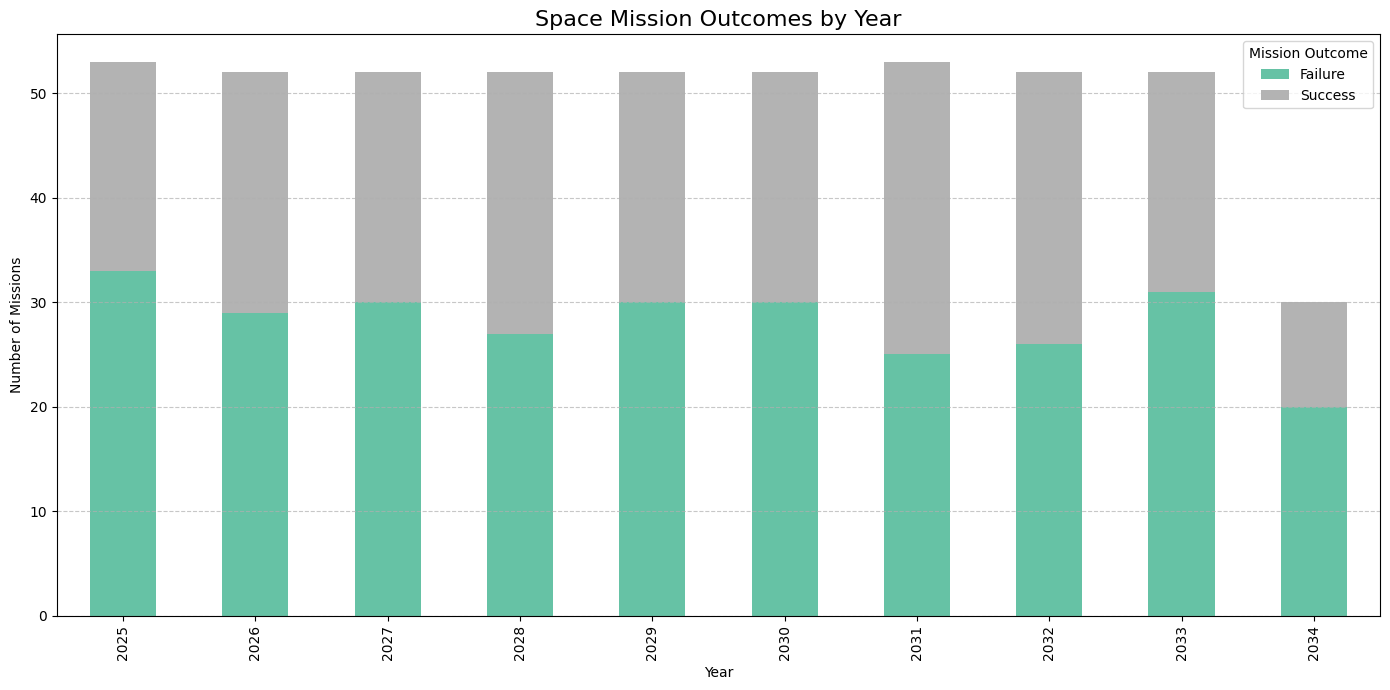

In [ ]:
data['Launch Year'] = data['Launch Date'].dt.year

success_by_year = data.groupby(['Launch Year', 'Mission Outcome']).size().unstack(fill_value=0)


success_by_year.plot(kind='bar', stacked=True, figsize=(14,7), colormap='Set2')
plt.title('Space Mission Outcomes by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.legend(title='Mission Outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##Setting the new dataset and visualizing outcomes by year

<Axes: xlabel='year', ylabel='count'>

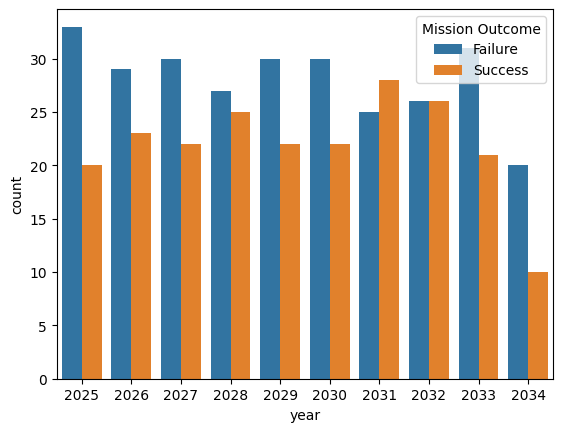

In [ ]:
df= pd.read_csv('/content/space_missions_with_outcomes.csv')
df
# Extract the year from the 'launch_date' column to create the new 'year' column
df['year'] = pd.to_datetime(df['Launch Date']).dt.year
sns.countplot(x='year', hue='Mission Outcome', data=df)

##Visualizing relationship between Percentage of mission success and cost

<Axes: xlabel='Mission Cost (billion USD)', ylabel='Mission Success (%)'>

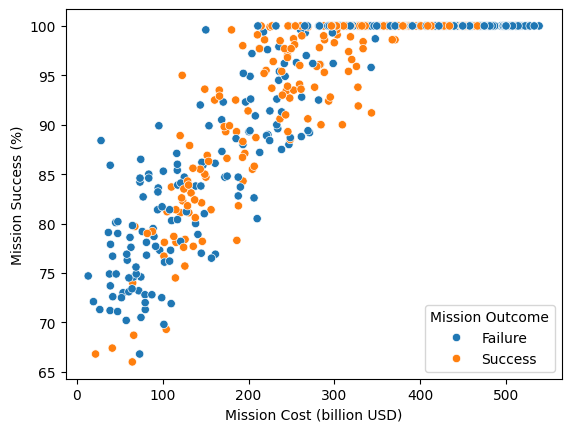

In [ ]:
sns.scatterplot(x='Mission Cost (billion USD)', y='Mission Success (%)', hue='Mission Outcome', data=df)


##Next two plots show failures and success

<ipython-input-17-7bd2d106f96e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data = df, x='Mission Outcome', y='Mission Success (%)', jitter=True, palette='Set2')


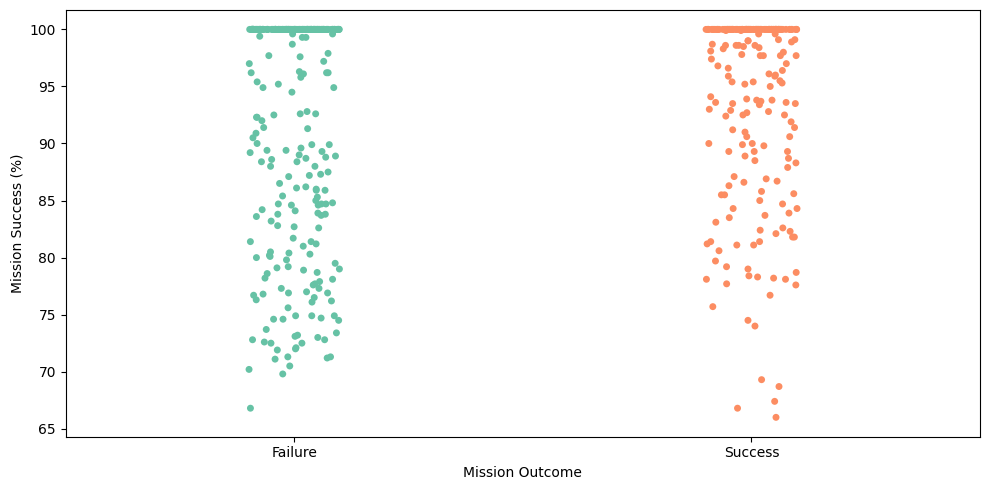

In [ ]:
plt.figure(figsize=(10,5))
sns.stripplot(data = df, x='Mission Outcome', y='Mission Success (%)', jitter=True, palette='Set2')
plt.tight_layout()
plt.show()

<ipython-input-18-a64c43f74aa9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x='Mission Outcome', y='Mission Success (%)', palette='Set2')
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 32.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 38.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-p

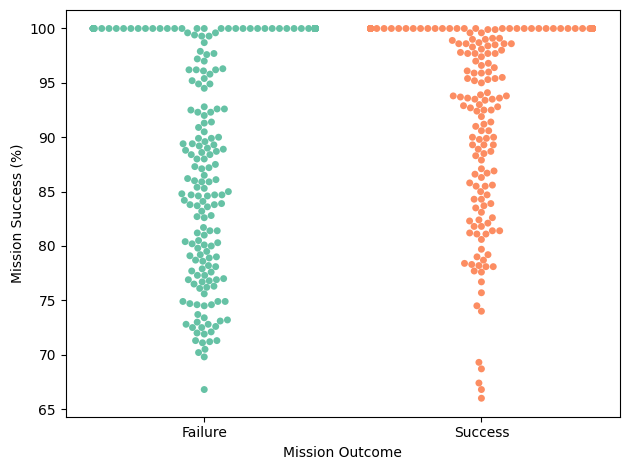

In [ ]:
sns.swarmplot(data=df, x='Mission Outcome', y='Mission Success (%)', palette='Set2')
plt.tight_layout()
plt.show()

##Setting 90 as threshold to show failed missions below 90

<ipython-input-19-d15afedf1e70>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x= 'Mission Outcome', y= 'Mission Success (%)', palette={"Success":"coral", "Failure":"mediumseagreen"})
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 22.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 31.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, Us

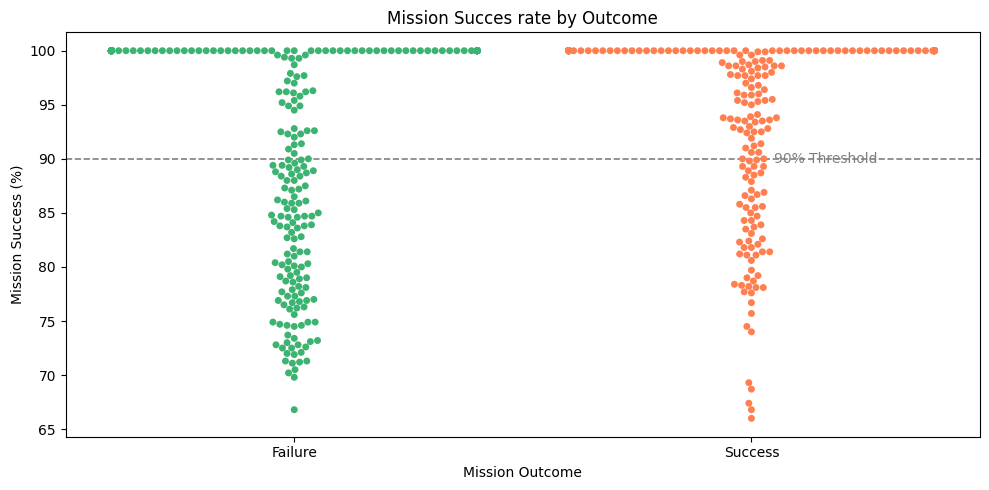

In [ ]:
plt.figure(figsize=(10,5))
sns.swarmplot(data=df, x= 'Mission Outcome', y= 'Mission Success (%)', palette={"Success":"coral", "Failure":"mediumseagreen"})

#Threshold
plt.axhline(90, color ="gray", linestyle ='--', linewidth = 1.2)
plt.text(1.05,90, '90% Threshold', color='gray', va='center')

plt.title("Mission Succes rate by Outcome")
plt.tight_layout()
plt.show()

#Model Building!

##Preprocess the data

In [ ]:
features = ['Mission Success (%)', 'Mission Duration (years)', 'Mission Cost (billion USD)','Scientific Yield (points)', 'Crew Size', "Fuel Consumption (tons)",'Payload Weight (tons)']

X = df[features]
y = df['Mission Outcome']

y = y.map({'Success': 1, 'Failure': 0})

##Train-test split
####Allocated 80 percent of the data to training and 20 percent to testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.91      0.79      0.84        62
           1       0.72      0.87      0.79        38

    accuracy                           0.82       100
   macro avg       0.81      0.83      0.82       100
weighted avg       0.84      0.82      0.82       100



##Random Forest: Training a classifier

In [ ]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##Evaluate the model

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 82.00%


In [ ]:
y_pred = model.predict(X_test)
print('Classification Report:/n', classification_report(y_test,y_pred))

print("Confusion Matrix:/n", confusion_matrix(y_test, y_pred))

Classification Report:/n               precision    recall  f1-score   support

           0       0.88      0.79      0.83        62
           1       0.70      0.82      0.76        38

    accuracy                           0.80       100
   macro avg       0.79      0.80      0.79       100
weighted avg       0.81      0.80      0.80       100

Confusion Matrix:/n [[49 13]
 [ 7 31]]


##Heatmaps

Develop visual reports and dashboards to represent the model's predictions and performance metrics effectively.

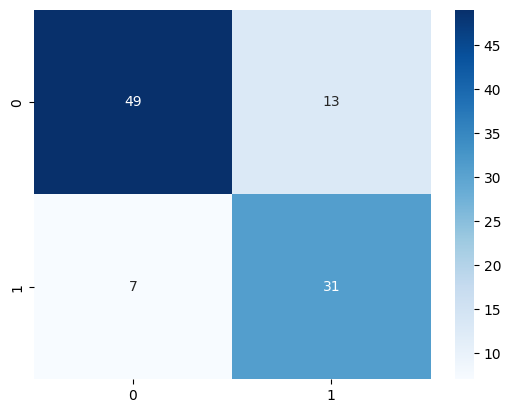

In [ ]:
# Assign the result of the confusion_matrix function to a variable
cm = confusion_matrix(y_test, y_pred)

# Pass the confusion matrix array to seaborn.heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

##Feature importance plot

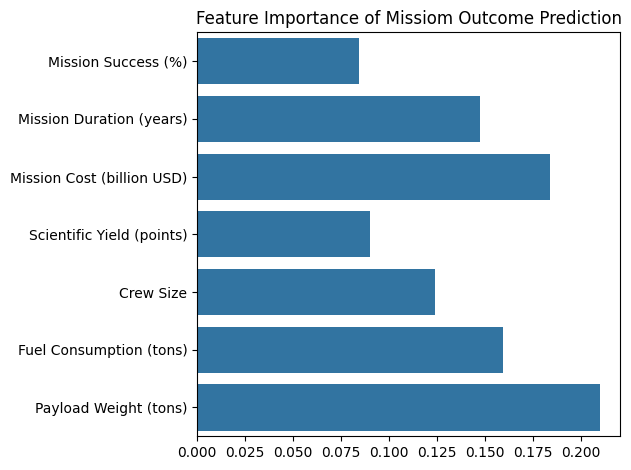

In [ ]:
importances = model.feature_importances_
sns.barplot(x=importances, y =features)
plt.title("Feature Importance of Missiom Outcome Prediction")
plt.tight_layout()
plt.show()

In [ ]:
# Create a sample new mission data (replace with your actual new mission data)
new_mission_data = {
    'Mission Success (%)': [95],
    'Mission Duration (years)': [5],
    'Mission Cost (billion USD)': [150],
    'Scientific Yield (points)': [200],
    'Crew Size': [10],
    "Fuel Consumption (tons)": [3000],
    'Payload Weight (tons)': [70]
}
new_mission_df = pd.DataFrame(new_mission_data)

# Make a prediction
prediction = model.predict(new_mission_df)

# Convert the numerical prediction back to the original labels
predicted_outcome = 'Success' if prediction[0] == 1 else 'Failure'

print(f"The predicted outcome for this mission is: {predicted_outcome}")

The predicted outcome for this mission is: Success


In [ ]:
# Create a sample new mission data likely to be predicted as failure
new_mission_data_failure = {
    'Mission Success (%)': [30],  # Low success percentage
    'Mission Duration (years)': [25], # Longer duration
    'Mission Cost (billion USD)': [50], # Potentially low cost for a long mission
    'Scientific Yield (points)': [80],  # Lower scientific yield
    'Crew Size': [70],  # Higher crew size
    "Fuel Consumption (tons)": [5000],  # Higher fuel consumption
    'Payload Weight (tons)': [90]  # Higher payload weight
}
new_mission_df_failure = pd.DataFrame(new_mission_data_failure)

# Make a prediction
prediction_failure = model.predict(new_mission_df_failure)

# Convert the numerical prediction back to the original labels
predicted_outcome_failure = 'Success' if prediction_failure[0] == 1 else 'Failure'

print(f"The predicted outcome for this mission is: {predicted_outcome_failure}")

The predicted outcome for this mission is: Failure


## Answering the Interview Question

Here's a possible structure for answering the interview question about a complex problem:

**1. The Complex Problem:**

*   **Problem:** I was working on a project to predict space mission success, but the dataset I had only contained successful missions. This presented a significant challenge for building a predictive model, as a model trained only on successes wouldn't be able to learn what factors contribute to failure.
*   **Impact:** Without data on failures, any model I built would be biased and unable to accurately predict the outcome of a mission that might encounter issues.

**2. The Action I Took:**

*   **Solution:** To address this, I decided to create synthetic failure data. Based on my understanding of the domain and the existing successful mission data, I defined a set of rules or criteria that would likely lead to mission failure. These rules were based on factors like:
    *   Insufficient funding for long-distance missions.
    *   Low scientific yield for ambitious mission types like colonization.
    *   High crew size and long mission duration.
    *   Excessive fuel consumption with a low success rate.
    *   Payload weight exceeding capacity.
    *   Using a launch vehicle not optimized for the mission type (e.g., Starship for mining).
*   **Implementation:** I implemented these rules in Python code to generate new rows in the dataset, marking them as "Failure" and assigning specific "Failure Reasons" based on which rules were triggered. This allowed me to create a more balanced dataset that included examples of both successful and unsuccessful missions.

**3. Lessons Learned:**

*   **Data Limitations:** This experience highlighted the importance of understanding the limitations of your data and being resourceful when faced with incomplete information.
*   **Creative Problem-Solving:** It taught me to think creatively and explore alternative approaches when standard methods are not applicable. Generating synthetic data, while requiring careful consideration and domain knowledge, can be a valuable technique in such situations.
*   **Importance of Failure Analysis:** It reinforced the significance of analyzing failures. By defining the potential reasons for failure, I gained a deeper understanding of the factors that influence mission outcomes, which ultimately improved the quality of my predictive model.
*   **Iterative Approach:** This process was iterative. I had to refine the failure rules and the synthetic data generation process based on how the model performed. This emphasized the importance of an iterative approach to model building and data preparation.